# Questions Summary

### Inference
* Q1: relationship between `song length` vs `popularity`

  `*use unique_spotify52kData_df*`

* Q2:  popularity on `explicit` vs ` non-explicit`

  `*use unique_spotify52kData_df*`
  
* Q3: popularity on `major` vs ` minor`

  `*use unique_spotify52kData_df*`

### ML

* Q4: linear regression (y = `popularity` ;  x = `[duration, danceability, energy, loudness, speechiness,
acousticness, instrumentalness, liveness, valence, tempo]`

    `*use unique_spotify52kData_df*`
    * Q4-1: best predictor
    * Q4-2: model assessment
* Q5: multiple regression (y = `popularity`)
    
    `*use unique_spotify52kData_df*`
    * Q5-1: model assessment (COD)
    * Q5-2: compare to Q4, explain improvements(if any) and why
    * Q5-3: Do *regularization* (lasso & ridge) and run again. Assess model (COD), compare with Q4 and explain.
* Q6: PCA

    `*use unique_spotify52kData_df*`

    * Q6-1: how many meaningful principal components? (use elbow criterion or Kaiser criterion)
    * Q6-2: how many proportion of variance accounted?
    * Q6-3: using the principle components, how many clusters identified? (use silhouette)
    * Q6-4: do clusters correspond to genre labels?
* Q7: x = `valence`, y = `key`.

    `*use unique_spotify52kData_df*`
    * Q7-1: use logistic regression classifier, model assessment (AUC)
    * Q7-2: use SVM classifier, model assessment (confusion matrix, f-1 score)
    * Q7-3: which one is better?
* Q8: y = `genre` ;  x = `[duration, danceability, energy, loudness, speechiness,
acousticness, instrumentalness, liveness, valence and tempo]`

    `*use unique_spotify52kData_df*`
    * Q8-1: linear regression (COD) & multiple regression (COD)
    * **[?] Q8-2: principle component (in Q6) with neural network?**

* Q9: recommender systems

    `*use spotify52kData + user explicit?*`
    * **[?] Q9-1: relationship `popularity` & `average star rating`**
    * **[?] Q9-2: 10 greatest hits by popularity based model**
* Q10: recommender systems

    *use spotify52kData + user explicit?*

    * **[?] Q10-1: personalizedm mixtape: 10 songs**
    * **Q10-2: model assessment (?)**

# ML Steps  (Q4 - Q8)
missing value -> standardize -> regression, regularization, PCA

test split -> logistic, SVM, recommender system

---

1. Data Processing:
    
    1.1 impute "missing values"
    1.2 standardize data

2. Run Regression

    2.1 Q4 linear regression

    2.2 Q5 multiple regression w & wo regularization

    2.3 Q6 PCA

3. Train prediction model Q7, Q8-1, Logistic, SVM, recommender system)
    3.1 Q7, Q8-1, Logistic, SVM

4. Recommender System

### Import Libraries & Seeding

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


# seeding (as per discord discussion)
np.random.seed(18089736)



Mounted at /content/drive


### Data Processing

In [ ]:
# Load the data - originally from Spotify API
spotify52kData_df = pd.read_csv('/content/drive/MyDrive/Courses/Fall 2023 IDS/IDS Projects/Capstone/spotify52kData.csv')

### v Q4 Linear Regression

Data Processing and explanation:

There are duplicate `track_name` in the data set, meaning there are songs with the same title appear multiple times in the dataset. For example, some duplicates are identical across all columns except the last column (`track_genre`) while there are some with the same `track_name` that appears in different `album_name`.

For Q4 Linear Regression, Q5 Multiple Regression, since we're trying to predict `popularity` based on the selected 10 features, we believe we should handle the duplicates before running the regression.

We believe it is reasonable to consider a "duplicate song" as a song that has the same values in  `['artists', 'album_name', 'track_name', 'duration','key']` columns but are different in other columns. The justification for this is these columns are the "basic traits" of a song, while other columns are somewhat "measurements" of a song, e.g. `danceability`, `speechiness`.
Measurements may contain measurement error that leads to possible duplicates.


After removal, data goes from `52000` rows to `45885` rows.

In [ ]:
'''Removal for duplicates in `spotify52kData`'''

# Define the columns to check for duplicates
duplicate_columns = ['artists', 'album_name', 'track_name', 'duration', 'key']

# Drop duplicates based on the specified columns
unique_spotify52kData_df = spotify52kData_df.drop_duplicates(subset=duplicate_columns, keep='first')

unique_spotify52kData_df

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.03220,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.92400,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.90500,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.46900,0.000000,0.0829,0.167,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,51995,Don Omar;Trebol Clan,Perreo Tenebroso Vol. 3,Tu Cuerpo Me Arrebata,0,203653,False,0.819,0.6450,10,-6.707,0,0.0481,0.23200,0.000863,0.1780,0.724,94.998,4,hip-hop
51996,51996,Don Omar,Feliz Cumpleaños con Perreo,Dale Don Dale,1,212413,False,0.831,0.8180,2,-7.827,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop
51997,51997,Don Omar,Última Misión Reggaeton,Dale Don Dale,0,212413,False,0.831,0.8180,2,-7.827,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop
51998,51998,Moneybagg Yo;Pooh Shiesty;Lil Durk;EST Gee,Energy Hip Hop,Switches & Dracs,0,168620,True,0.727,0.6470,11,-7.383,0,0.2800,0.03290,0.000000,0.2460,0.529,159.959,4,hip-hop


In [ ]:
# Substract columns for predictors
feature10_spotify52kData_df = unique_spotify52kData_df.loc[:, ['popularity','duration', 'danceability', 'energy', 'loudness', 'speechiness',
'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']] # type(dataframe)
feature10_spotify52kData_df


,popularity,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,73,230666,0.676,0.4610,-6.746,0.1430,0.03220,0.000001,0.3580,0.715,87.917
1,55,149610,0.420,0.1660,-17.235,0.0763,0.92400,0.000006,0.1010,0.267,77.489
2,57,210826,0.438,0.3590,-9.734,0.0557,0.21000,0.000000,0.1170,0.120,76.332
3,71,201933,0.266,0.0596,-18.515,0.0363,0.90500,0.000071,0.1320,0.143,181.740
4,82,198853,0.618,0.4430,-9.681,0.0526,0.46900,0.000000,0.0829,0.167,119.949
...,...,...,...,...,...,...,...,...,...,...,...
51995,0,203653,0.819,0.6450,-6.707,0.0481,0.23200,0.000863,0.1780,0.724,94.998
51996,1,212413,0.831,0.8180,-7.827,0.0824,0.02450,0.000319,0.0892,0.819,95.022
51997,0,212413,0.831,0.8180,-7.827,0.0824,0.02450,0.000319,0.0892,0.819,95.022
51998,0,168620,0.727,0.6470,-7.383,0.2800,0.03290,0.000000,0.2460,0.529,159.959


In [ ]:
best_r2 = -1
best_predictor = None

for i in range(1, 11):  # Loop from column 1 to 11 (Python index starts at 0)
    X = feature10_spotify52kData_df.iloc[:, [i]]  # Predictor
    y = feature10_spotify52kData_df.iloc[:, 0]    # Target (popularity)

    X_column_name = feature10_spotify52kData_df.columns[i]
    y_column_name = feature10_spotify52kData_df.columns[0]

    # Linear Regression
    reg = LinearRegression()
    reg.fit(X, y)
    y_pred = reg.predict(X)

    # Calculate R^2 Score
    r2 = r2_score(y, y_pred)
    print(f'{i} R^2 score for {X_column_name}: {r2}')

    # print("\n\n" + "method 2")
    # model = LinearRegression().fit(X, y)
    # y_pred = model.predict(X)
    # r2 = r2_score(y, y_pred)
    # print(f'{i} R^2 score for {X_column_name}: {r2}')

    # Update best predictor and r2  (higher r2 means better predictor)
    if r2 > best_r2:
      best_r2 = r2
      best_predictor = X_column_name

    ''' Notes only
      # Plotting (this will take a long time)
      plt.figure(figsize=(8, 6))
      sns.scatterplot(x=X.iloc[:, 0], y=y, color='blue')
      sns.lineplot(x=X.iloc[:, 0], y=y_pred, color='red')
      plt.title(f'Scatter Plot with Linear Regression: {X_column_name}')
      plt.xlabel(f'{X_column_name}')
      plt.ylabel(f'{y_column_name}')
      plt.show()
    '''

print("best_r2 = " + str(best_r2) + "\n" + "best_predictor = " + str(best_predictor))

1 R^2 score for duration: 0.004571940442307798
2 R^2 score for danceability: 0.002156134430675971
3 R^2 score for energy: 0.005153318772772919
4 R^2 score for loudness: 0.002488041970832522
5 R^2 score for speechiness: 0.003166494314920776
6 R^2 score for acousticness: 0.0013867677840032622
7 R^2 score for instrumentalness: 0.02475862020791264
8 R^2 score for liveness: 0.00295952478150574
9 R^2 score for valence: 0.000579447146201395
10 R^2 score for tempo: 0.00013931989174442716
best_r2 = 0.02475862020791264
best_predictor = instrumentalness


#### Iris's playground: another way to calculate Linear Regression r2

In [ ]:

A = feature10_spotify52kData_df['instrumentalness'].values.reshape(-1,1)
B = feature10_spotify52kData_df['popularity'].values.reshape(-1,1)

model = LinearRegression().fit(A, B)

# Predict and evaluate (higher r^2 means better predictor)
B_pred = model.predict(A)
COD = r2_score(B, B_pred)

# print(B_pred)
print(COD)


0.02475862020791264


### Q5 Multiple Regression

#### Without Regulariztion

In [ ]:
X = feature10_spotify52kData_df.iloc[:, 1:12]  # Columns 1 to 11 as predictors
y = feature10_spotify52kData_df.iloc[:, 0]     # Column 0 as the target (popularity)

multireg = LinearRegression()
multireg.fit(X, y)
y_pred = multireg.predict(X)
r2 = r2_score(y, y_pred)
print(f'R^2 score: {r2}')
rmse = sqrt(mean_squared_error(y, y_pred))
print(f'RMSE: {rmse}')

R^2 score: 0.054207441341046825
RMSE: 20.258913150826377


#### With Regularization

In [ ]:
## test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18089736)

Lasso

In [ ]:
lasso_cv = LassoCV(alphas = np.logspace(-6, 6, 13))  # generates 13 numbers between 10^(-6) and 10^6

lasso_cv.fit(X_train, y_train)

# Optimal alpha
optimal_alpha_lasso = lasso_cv.alpha_
print(f'Optimal alpha for Lasso: {optimal_alpha_lasso}')

# Evaluate on test data
y_pred_lasso = lasso_cv.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso R^2 score: {r2_lasso}')
rmse_lasso = sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f'Lasso RMSE: {rmse_lasso}')

Optimal alpha for Lasso: 0.0001
Lasso R^2 score: 0.05302642048303452
Lasso RMSE: 20.22564807766997


Ridge

In [ ]:
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13))  # generates 13 numbers between 10^(-6) and 10^6
ridge_cv.fit(X_train, y_train)

# Optimal alpha
optimal_alpha_ridge = ridge_cv.alpha_
print(f'Optimal alpha for Ridge: {optimal_alpha_ridge}')

# Evaluate on test data
y_pred_ridge = ridge_cv.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge R^2 score: {r2_ridge}')
rmse_ridge = sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f'Ridge RMSE: {rmse_ridge}')

Optimal alpha for Ridge: 10.0
Ridge R^2 score: 0.05302573889583395
Ridge RMSE: 20.225655356405444


### Q6 PCA & Clusters (silhouette)

10 features: `[duration, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo]`


Q6-1: how many meaningful principal components? (use elbow criterion or Kaiser criterion)

Q6-2: how many proportion of variance accounted?

Q6-3: using the principle components, how many clusters identified? (use silhouette)

Q6-4: do clusters correspond to genre labels?

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# PCA is affected by scale, so you need to scale the features in your data before applying PCA. Use StandardScaler to standardize the dataset’s features onto a unit scale (mean = 0 and variance = 1).

In [ ]:
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Extracting the features
x = unique_spotify52kData_df.loc[:, features].values # type = numpy.ndarray

# Standardizing the features
x = StandardScaler().fit_transform(x)


[0.2733881  0.16173598 0.13845787 0.0979588  0.08752094 0.08148307
 0.06782686 0.0471572  0.03131337 0.01315782]


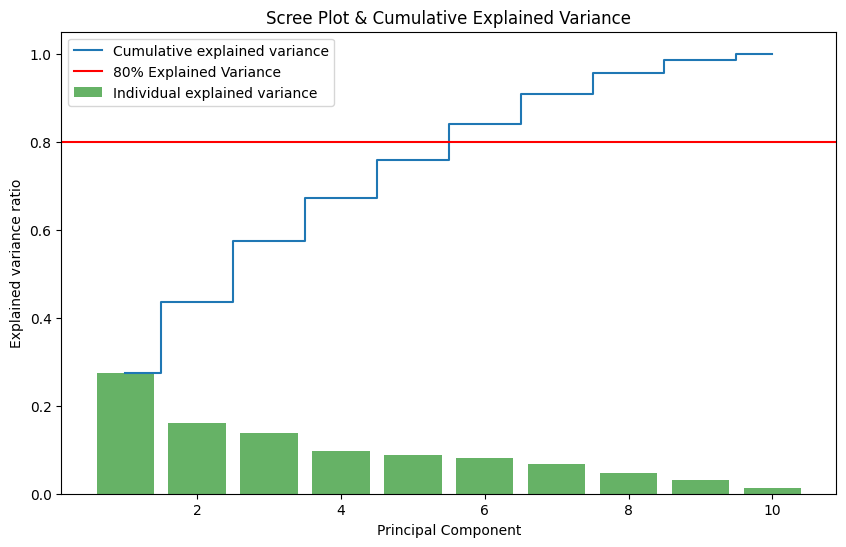

array([0.2733881 , 0.43512407, 0.57358194, 0.67154074, 0.75906168,
       0.84054475, 0.90837161, 0.95552881, 0.98684218, 1.        ])

In [ ]:
pca = PCA(n_components = 10)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2', 'pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])
explained_variances = pca.explained_variance_ratio_

# Calculating cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variances)

print(explained_variances) # sum = 1

# Creating a plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), explained_variances, alpha=0.6, color='g', label='Individual explained variance')
plt.step(range(1, 11), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.axhline(y=0.8, color='r', linestyle='-', label='80% Explained Variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Component')
plt.title('Scree Plot & Cumulative Explained Variance')
plt.legend(loc='best')
plt.show()

cumulative_explained_variance  # Return this for further analysis


* The Elbow Method: From the scree plot, you can see a notable 'elbow' around the 5th principal component.
* Variance Accounted: 75%

Cluster Identified

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

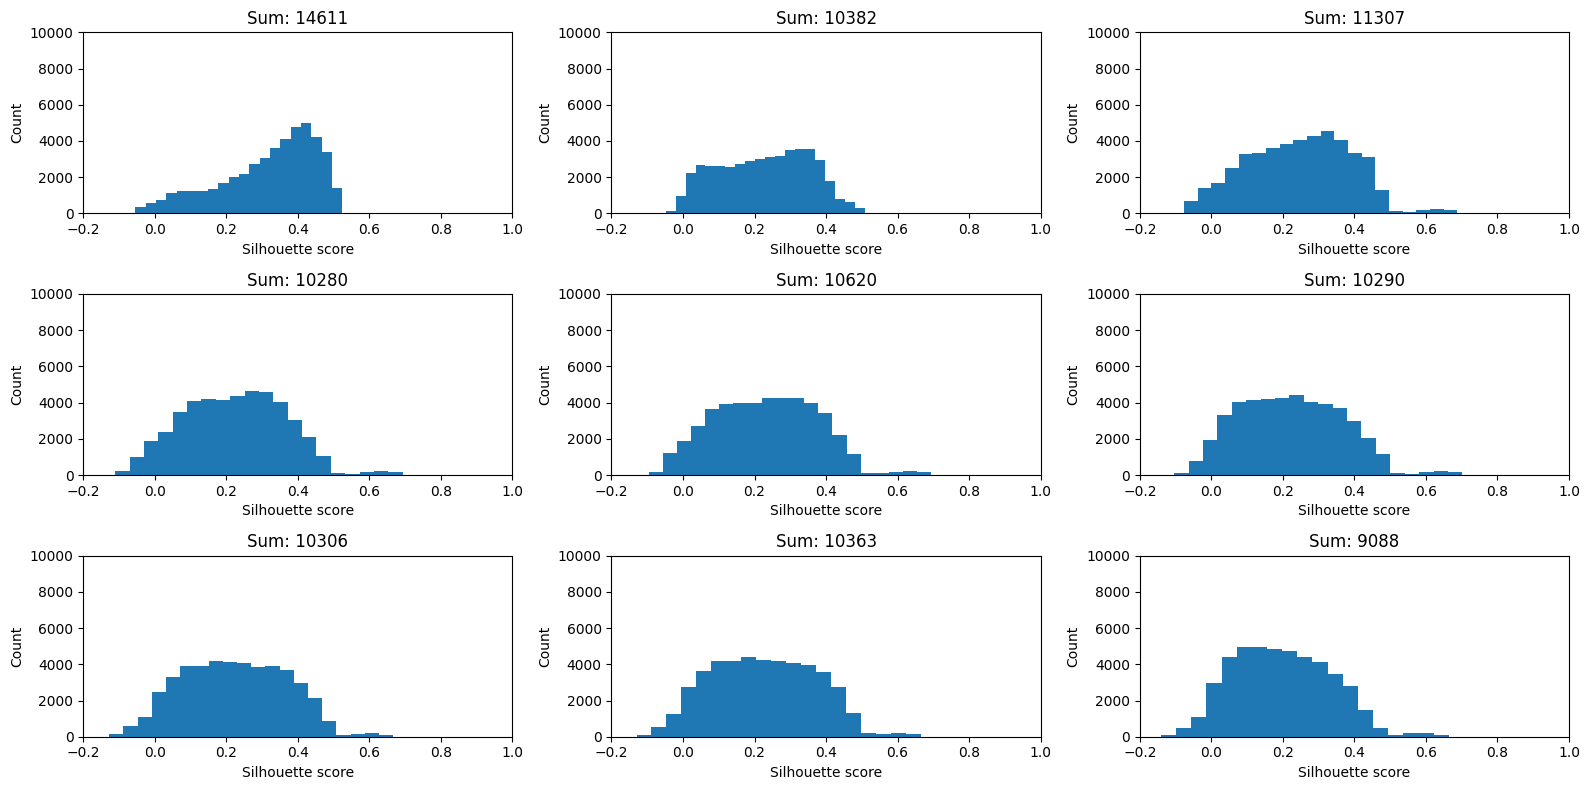

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline


features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

features_pca_pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=5))]) # reducing the dimensionality of the data to 2 principal components
features_processed = features_pca_pipeline.fit_transform(unique_spotify52kData_df.loc[:, features])

numClusters = 10
Q = np.empty([numClusters,1])*np.NaN # init container to store sums


# Compute kMeans:
plt.figure(figsize=(16, 8))
for ii in range(2, 11): # Loop through each cluster (from 2 to 10!)
    kMeans = KMeans(n_clusters = int(ii), random_state=18089736).fit(features_processed) # compute kmeans using scikit
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(features_processed,cId) # compute the mean silhouette coefficient of all samples
    Q[ii-2] = sum(s) # take the sum
    # Plot data:
    plt.subplot(3,3,ii-1)
    plt.hist(s,bins=20)
    plt.xlim(-0.2,1)
    plt.ylim(0,10000)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(Q[ii-2]))) # sum rounded to nearest integer
    plt.tight_layout() # adjusts subplot padding


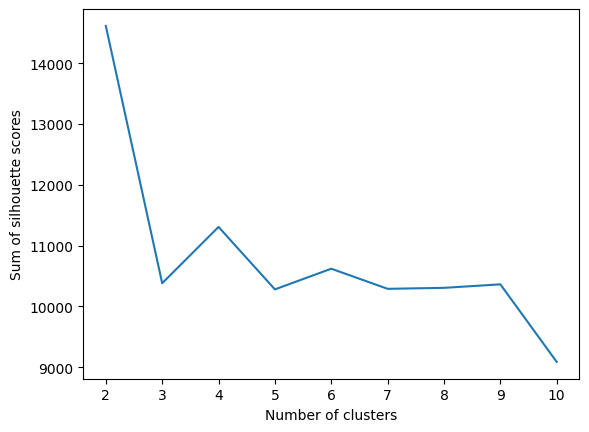

In [ ]:
plt.plot(np.linspace(2,11,10),Q)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()

As per above graph, the peak of the silhouette scores for optimal clustering lies in 2.

### Q7 Logistic Regression & SVM

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

In [ ]:
X = unique_spotify52kData_df[['valence']]  # Predictor
y = unique_spotify52kData_df['mode']  # Target

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18089736)

Logistic Regression

0.516838652450368


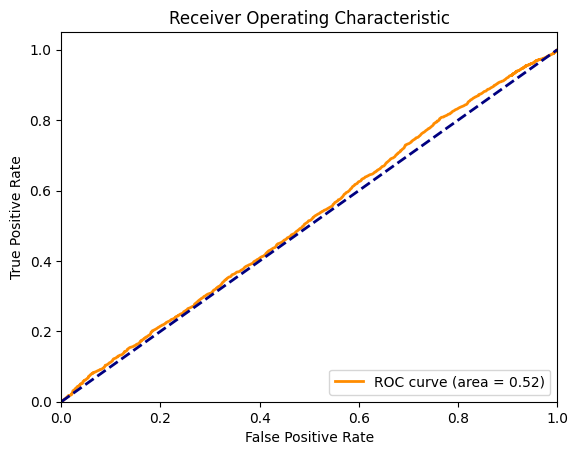

In [ ]:
# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict probabilities
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


SVM

In [ ]:
# Train the Support Vector Machine model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6279830009807127

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3414
           1       0.63      1.00      0.77      5763

    accuracy                           0.63      9177
   macro avg       0.31      0.50      0.39      9177
weighted avg       0.39      0.63      0.48      9177


Confusion Matrix:
 [[   0 3414]
 [   0 5763]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Features list
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


# Target variable
y = unique_spotify52kData_df['mode']

# DataFrame to store the results
results_df = pd.DataFrame(columns=['Feature', 'Logistic_Regression_AUC'])

for feature in features:
    # Using one feature at a time
    X = unique_spotify52kData_df[[feature]]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18089736)

    # Logistic Regression
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    log_reg_acc = log_reg.score(X_test, y_test)  # Accuracy of logistic regression
    # Predict probabilities
    y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

    # Calculate ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Append results to the DataFrame
    results_df = results_df.append({'Feature': feature,
                                    'Logistic_Regression_AUC': roc_auc}, ignore_index=True)

# Print the results
print(results_df)

<ipython-input-27-5754370e464b>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature,
<ipython-input-27-5754370e464b>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature,
<ipython-input-27-5754370e464b>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature,
<ipython-input-27-5754370e464b>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature,
<ipython-input-27-5754370e464b>:33: FutureWarning: The frame.append method is deprecated and will be removed

            Feature  Logistic_Regression_AUC
0          duration                 0.473642
1      danceability                 0.541917
2            energy                 0.548534
3          loudness                 0.527448
4       speechiness                 0.564836
5      acousticness                 0.557890
6  instrumentalness                 0.539263
7          liveness                 0.514153
8           valence                 0.516839
9             tempo                 0.509461


<ipython-input-27-5754370e464b>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature,
<ipython-input-27-5754370e464b>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature,


### Iris's playground

In [ ]:
def train_model(trainmodel, train, y_train, test, y_test):
    classifier = trainmodel.fit(train,y_train)
    y_pred = classifier.predict(X_test)
    pd.DataFrame({'y_pred':y_pred,
                 'y_test':y_test})
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(trainmodel,'：',accuracy)
    print(cm)
    print(cr)

Logistic Regression

In [ ]:
train_model(LogisticRegression(random_state=18089736), X_train, y_train, X_test, y_test)

LogisticRegression(random_state=18089736) ： 0.11114743380189604
[[  0   0  79   0   0   0   0 915   0   0   0   0]
 [  0   0  71   0   0   0   0 867   0   0   0   0]
 [  0   0  79   0   0   0   0 832   0   0   0   0]
 [  0   0  29   0   0   0   0 246   0   0   0   0]
 [  0   0  55   0   0   0   0 678   0   0   0   0]
 [  0   0  59   0   0   0   0 665   0   0   0   0]
 [  0   0  33   0   0   0   0 630   0   0   0   0]
 [  0   0  81   0   0   0   0 941   0   0   0   0]
 [  0   0  40   0   0   0   0 537   0   0   0   0]
 [  0   0  71   0   0   0   0 833   0   0   0   0]
 [  0   0  33   0   0   0   0 615   0   0   0   0]
 [  0   0  47   0   0   0   0 741   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       994
           1       0.00      0.00      0.00       938
           2       0.12      0.09      0.10       911
           3       0.00      0.00      0.00       275
           4       0.00      0.00      0.00       73

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM

In [ ]:
train_model(svm.SVC(random_state=18089736), X_train, y_train, X_test, y_test)

SVC(random_state=18089736) ： 0.11278195488721804
[[171   0   0   0   0   0   0 823   0   0   0   0]
 [112   0   0   0   0   0   0 826   0   0   0   0]
 [119   0   0   0   0   0   0 792   0   0   0   0]
 [ 44   0   0   0   0   0   0 231   0   0   0   0]
 [ 90   0   0   0   0   0   0 643   0   0   0   0]
 [111   0   0   0   0   0   0 613   0   0   0   0]
 [ 98   0   0   0   0   0   0 565   0   0   0   0]
 [158   0   0   0   0   0   0 864   0   0   0   0]
 [ 86   0   0   0   0   0   0 491   0   0   0   0]
 [133   0   0   0   0   0   0 771   0   0   0   0]
 [ 91   0   0   0   0   0   0 557   0   0   0   0]
 [147   0   0   0   0   0   0 641   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.13      0.17      0.15       994
           1       0.00      0.00      0.00       938
           2       0.00      0.00      0.00       911
           3       0.00      0.00      0.00       275
           4       0.00      0.00      0.00       733
           5 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Features list
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


# Target variable
y = unique_spotify52kData_df['mode']

# DataFrame to store the results
results_df = pd.DataFrame(columns=['Feature', 'Logistic_Regression_AUC', 'SVM_Accuracy'])

for feature in features:
    # Using one feature at a time
    X = unique_spotify52kData_df[[feature]]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18089736)

    # Logistic Regression
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    log_reg_acc = log_reg.score(X_test, y_test)  # Accuracy of logistic regression
    # Predict probabilities
    y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

    # Calculate ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # SVM
    svm_model = SVC()
    svm_model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = svm_model.predict(X_test)

    # Evaluate the model
    svm_accuracy = accuracy_score(y_test, y_pred)

    # Append results to the DataFrame
    results_df = results_df.append({'Feature': feature,
                                    'Logistic_Regression_AUC': roc_auc,
                                    'SVM_Accuracy': svm_accuracy}, ignore_index=True)

# Print the results
print(results_df)

<ipython-input-23-54913bdbc0ff>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature,
<ipython-input-23-54913bdbc0ff>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature,
<ipython-input-23-54913bdbc0ff>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature,
<ipython-input-23-54913bdbc0ff>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature,
<ipython-input-23-54913bdbc0ff>:42: FutureWarning: The frame.append method is deprecated and will be removed

            Feature  Logistic_Regression_AUC  SVM_Accuracy
0          duration                 0.473642      0.627983
1      danceability                 0.541917      0.627983
2            energy                 0.548534      0.627983
3          loudness                 0.527448      0.627983
4       speechiness                 0.564836      0.627983
5      acousticness                 0.557890      0.627983
6  instrumentalness                 0.539263      0.627983
7          liveness                 0.514153      0.627983
8           valence                 0.516839      0.627983
9             tempo                 0.509461      0.627983


<ipython-input-23-54913bdbc0ff>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature,


### Q8 Can you predict genre by using the 10 song features from question 4 directly or the principal components you extracted in question 6 with a neural network? How well does this work?

In [ ]:
seeding
unfinished predicator

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the data
df = pd.read_csv('/content/drive/MyDrive/IDS Projects/Capstone/spotify52kData.csv')

# Remove duplicates
duplicate_columns = ['artists', 'album_name', 'track_name', 'duration', 'key']
unique_spotify52kData_df = df.drop_duplicates(subset=duplicate_columns, keep='first')

# Selecting features and target
features = unique_spotify52kData_df[['duration', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
target = unique_spotify52kData_df['track_genre']

# Encode the target variable
encoder = LabelEncoder()
encoded_target = encoder.fit_transform(target)
# Convert encoded labels to one hot encoding
target_one_hot = to_categorical(encoded_target)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(features, target_one_hot, test_size = 0.2, random_state = 0)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Neural Network Model
model = Sequential([
    Dense(64, input_shape=(10,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100}')


Epoch 1/100
3671/3671 [==============================] - 8s 2ms/step - loss: 2.9226 - accuracy: 0.2143
Epoch 2/100
3671/3671 [==============================] - 8s 2ms/step - loss: 2.6975 - accuracy: 0.2587
Epoch 3/100
3671/3671 [==============================] - 6s 2ms/step - loss: 2.6444 - accuracy: 0.2694
Epoch 4/100
3671/3671 [==============================] - 9s 2ms/step - loss: 2.6107 - accuracy: 0.2813
Epoch 5/100
3671/3671 [==============================] - 6s 2ms/step - loss: 2.5838 - accuracy: 0.2859
Epoch 6/100
3671/3671 [==============================] - 8s 2ms/step - loss: 2.5598 - accuracy: 0.2930
Epoch 7/100
3671/3671 [==============================] - 6s 2ms/step - loss: 2.5412 - accuracy: 0.2976
Epoch 8/100
3671/3671 [==============================] - 10s 3ms/step - loss: 2.5242 - accuracy: 0.3026
Epoch 9/100
3671/3671 [==============================] - 7s 2ms/step - loss: 2.5081 - accuracy: 0.3066
Epoch 10/100
3671/3671 [==============================] - 8s 2ms/step - 

# Inference Steps (Q1 - Q3)

### Q1 Inference: Song Length and Popularity: 1) Is there a relationship between song length and popularity of a song? If so, is it positive or negative?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


<ipython-input-12-e002686bf366>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_spotify52kData_df['duration_min'] = unique_spotify52kData_df['duration'] / 60000


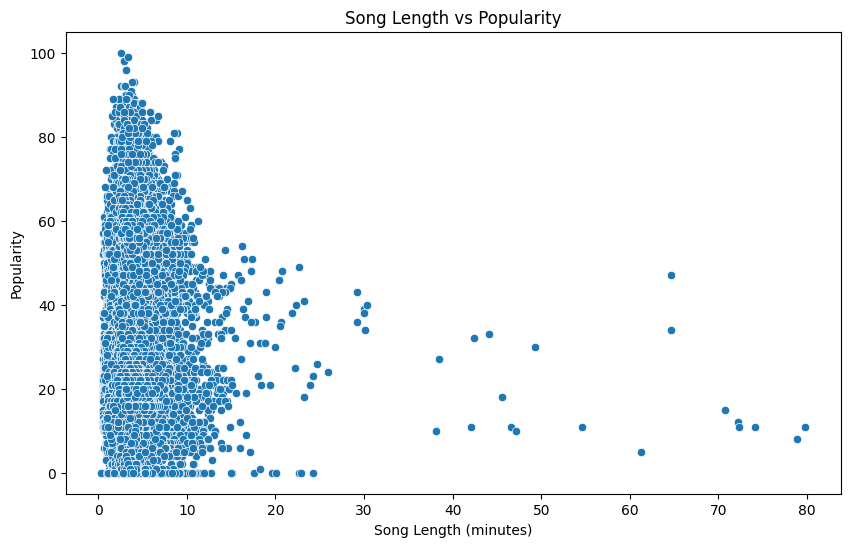

Correlation coefficient: -0.06761612560852313
The correlation is statistically significant.
There is a negative relationship between song length and popularity.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the data
df = pd.read_csv('/content/drive/MyDrive/IDS Projects/Capstone/spotify52kData.csv')

# Remove duplicates
duplicate_columns = ['artists', 'album_name', 'track_name', 'duration', 'key']
unique_spotify52kData_df = df.drop_duplicates(subset=duplicate_columns, keep='first')

# Converting to mins
unique_spotify52kData_df['duration_min'] = unique_spotify52kData_df['duration'] / 60000

# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_min', y='popularity', data=unique_spotify52kData_df)
plt.title('Song Length vs Popularity')
plt.xlabel('Song Length (minutes)')
plt.ylabel('Popularity')
plt.show()

# Calculating Pearson correlation
correlation, p_value = pearsonr(unique_spotify52kData_df['duration_min'], unique_spotify52kData_df['popularity'])

# Showing results
print(f"Correlation coefficient: {correlation}")
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

# Interpretation
if correlation > 0:
    print("There is a positive relationship between song length and popularity.")
elif correlation < 0:
    print("There is a negative relationship between song length and popularity.")
else:
    print("There is no linear relationship between song length and popularity.")


### Q2 popularity on explicit vs non-explicit: Are explicitly rated songs more popular than songs that are not explicit?

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind, levene


# Divide the dataset into explicit and non-explicit songs
explicit_songs = unique_spotify52kData_df[unique_spotify52kData_df['explicit'] == 1]['popularity']
non_explicit_songs = unique_spotify52kData_df[unique_spotify52kData_df['explicit'] == 0]['popularity']

# Check for equality of variances (Levene's Test)
stat, p_value = levene(explicit_songs, non_explicit_songs)
print('Levene’s Test for Equality of Variances')
print('Statistics=%.3f, p=%.3f' % (stat, p_value))

# Decide which test to use based on the Levene's Test result
if p_value > 0.05:
    print('\nVariances are similar. Using Independent Samples t-test.')
    t_stat, p_value = ttest_ind(explicit_songs, non_explicit_songs, equal_var=True)
else:
    print('\nVariances are not similar. Using Welch t-test.')
    t_stat, p_value = ttest_ind(explicit_songs, non_explicit_songs, equal_var=False)

# Showing the results
print(f'\nTest Result:\nT-statistic: {t_stat}\nP-value: {p_value}')


Levene’s Test for Equality of Variances
Statistics=35.424, p=0.000

Variances are not similar. Using Welch t-test.

Test Result:
T-statistic: 9.05145703058167
P-value: 1.8488170385781355e-19


### Q3 popularity on major vs minor: Are songs in major key more popular than songs in minor key?

In [ ]:
import pandas as pd
from scipy.stats import levene, ttest_ind

# Divide the dataset into major and minor key songs
major_key_songs = unique_spotify52kData_df[unique_spotify52kData_df['mode'] == 1]['popularity']
minor_key_songs = unique_spotify52kData_df[unique_spotify52kData_df['mode'] == 0]['popularity']

# Check for equality of variances (Levene's Test)
stat, p_value = levene(major_key_songs, minor_key_songs)
print('Levene’s Test for Equality of Variances')
print('Statistics=%.3f, p=%.3f' % (stat, p_value))

# Choose the test based on the equality of variances
if p_value > 0.05:
    print('\nVariances are similar. Using Independent Samples t-test.')
    t_stat, p_value = ttest_ind(major_key_songs, minor_key_songs, equal_var=True)
else:
    print('\nVariances are not similar. Using Welch t-test.')
    t_stat, p_value = ttest_ind(major_key_songs, minor_key_songs, equal_var=False)

# Showing the results
print(f'\nTest Result:\nT-statistic: {t_stat}\nP-value: {p_value}')


Levene’s Test for Equality of Variances
Statistics=37.861, p=0.000

Variances are not similar. Using Welch t-test.

Test Result:
T-statistic: -5.279944298176776
P-value: 1.299836437712411e-07


# IDS Capstone Q9 - EC (Bess Yang)

##### ***Star ratings are ordinal/ranked in nature. We mostly treat it as numeric here for the sake of data analysis.

In [ ]:
import pandas as pd
import numpy as np

import pingouin as pg
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score

#!pip install scikit-surprise

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# seeding using Iris' N number (as per discord discussion)
seed = np.random.seed(18089736)

In [ ]:
# load dataset
df = pd.read_csv('./data/spotify52kData.csv')
df

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.03220,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.92400,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.90500,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.46900,0.000000,0.0829,0.167,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,51995,Don Omar;Trebol Clan,Perreo Tenebroso Vol. 3,Tu Cuerpo Me Arrebata,0,203653,False,0.819,0.6450,10,-6.707,0,0.0481,0.23200,0.000863,0.1780,0.724,94.998,4,hip-hop
51996,51996,Don Omar,Feliz Cumpleaños con Perreo,Dale Don Dale,1,212413,False,0.831,0.8180,2,-7.827,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop
51997,51997,Don Omar,Última Misión Reggaeton,Dale Don Dale,0,212413,False,0.831,0.8180,2,-7.827,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop
51998,51998,Moneybagg Yo;Pooh Shiesty;Lil Durk;EST Gee,Energy Hip Hop,Switches & Dracs,0,168620,True,0.727,0.6470,11,-7.383,0,0.2800,0.03290,0.000000,0.2460,0.529,159.959,4,hip-hop


In [ ]:
#so it's not exactly 10k user, eh? -- 9999
fb = pd.read_csv('./data/starRatings.csv')
fb

,NaN,NaN.1,NaN.2,NaN.3,NaN.4,NaN.5,NaN.6,NaN.7,NaN.8,NaN.9,...,NaN.4462,0.152,NaN.4463,NaN.4464,NaN.4465,NaN.4466,NaN.4467,NaN.4468,NaN.4469,NaN.4470
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,0.0
2,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# no missing value in df
df.isnull().sum()

songNumber          0
artists             0
album_name          0
track_name          0
popularity          0
duration            0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
#many missing values for explicit feedback, no surprise here
fb.isnull().sum()

NaN         9019
NaN.1       8988
NaN.2       8942
NaN.3       8973
NaN.4       8969
            ... 
NaN.4466    9018
NaN.4467    8984
NaN.4468    8985
NaN.4469    8980
NaN.4470    8950
Length: 5000, dtype: int64

In [ ]:
# """"Since the star ratings should be on a scale of 0 to 4, remove all values over 4 and replace them with Nan"""

# fb[fb > 4] = np.nan

In [ ]:
# #check again

# # Create a boolean DataFrame where True indicates a number greater than 5
# bool_fb = fb > 4

# # Sum all the True values in the DataFrame to get the count
# count_over_four = bool_fb.sum().sum()

# print(f"Number of elements over 4: {count_over_four}")

## Q9. In recommender systems, the popularity based model is an important baseline. We have a two part question in this regard:

### Data processing

In [ ]:
#we are only using the first 5k songs for question 9 and 10
df = df.iloc[:5000]
df

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.6760,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.4200,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.4380,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.2660,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.6180,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,Ludovico Einaudi,Elements (Deluxe),Drop,49,300293,False,0.4650,0.0342,2,-28.257,0,0.0401,0.9920,0.939000,0.1030,0.0590,152.054,4,ambient
4996,4996,Air,Moon Safari,Kelly Watch the Stars,55,226293,False,0.5160,0.7430,2,-8.470,1,0.0292,0.2820,0.637000,0.1110,0.2260,109.837,4,ambient
4997,4997,Ludovico Einaudi,Islands - Essential Einaudi,Passagio,50,357773,False,0.2220,0.0200,9,-27.114,1,0.0464,0.9950,0.948000,0.0945,0.1190,85.860,4,ambient
4998,4998,Liquid Mind,Liquid Mind II: Slow World,Blue Seven,24,760053,False,0.0576,0.1690,10,-20.216,1,0.0484,0.9030,0.966000,0.1170,0.0310,50.838,4,ambient


In [ ]:
#not removing duplicates bc no two rows are the same, so I'll treat them as unique/dfferent soundtracks

df.duplicated().sum()

0

In [ ]:
#Compare it against what Iris did to remove duplicates for her problems
df.duplicated(subset=['artists', 'album_name', 'track_name', 'duration', 'key']).sum()

613

In [ ]:
fb

,NaN,NaN.1,NaN.2,NaN.3,NaN.4,NaN.5,NaN.6,NaN.7,NaN.8,NaN.9,...,NaN.4462,0.152,NaN.4463,NaN.4464,NaN.4465,NaN.4466,NaN.4467,NaN.4468,NaN.4469,NaN.4470
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,0.0
2,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#check for row duplicates in star ratings
fb.duplicated().sum()

0

In [ ]:
#check for any user row with all Nan values
fb.isna().all(axis=1).sum()

0

In [ ]:
"""let's now check how many column duplicates there are in star ratings
This shows if there are two songs with the same user rating patterns"""

# Transpose fb
fb_t = fb.T

# Check for duplicated columns (which are now rows)
duplicate_columns = fb_t.duplicated()

# Get the column names that are duplicates
duplicate_column_names = fb_t.index[duplicate_columns].tolist()

duplicate_column_names

[]

Since there are no duplicates for star ratings column-wise or row-wise, we shouldn't remove any duplicates for star ratings. We shouldn't remove any duplicate songtracks for main df for Q9 and 10 as well because they correspond to unique/different user explicit feedback patterns, even if they have the same identifiers like soundtrack title.

In [ ]:
""""calculate average star rating for each user, add it as a new column in fb.
I'm not doing any kind of data processing for missing values (no deletion, no imputation)
because it will change the shape/results of the data and affect end results.
Dropping rows would affect how they songtracks match the users,
imputation would affect/distort all analysis results, and since there is no one user row with all Nan values,
all user rows contain meaningful information.
So I'm just treating it as is."""

#calculate average star ratings, add to a new column in fb_t

fb_t['mean_rating'] = fb_t.mean(axis=1)
fb_t

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,mean_rating
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.196939
NaN.1,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN,1.0,1.361029
NaN.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,0.0,NaN,NaN,NaN,NaN,2.186377
NaN.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.576998
NaN.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.038835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN.4466,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.833843
NaN.4467,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.368473
NaN.4468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.914201
NaN.4469,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.890088


In [ ]:
fb_t = fb_t.reset_index(drop=True)
fb_t

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,mean_rating
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.196939
1,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN,1.0,1.361029
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,0.0,NaN,NaN,NaN,NaN,2.186377
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.576998
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.038835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.833843
4996,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.368473
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.914201
4998,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.890088


### a) Is there a relationship between popularity and average star rating for the 5k songs we have explicit feedback for?

In [ ]:
df['popularity']

0       73
1       55
2       57
3       71
4       82
        ..
4995    49
4996    55
4997    50
4998    24
4999    26
Name: popularity, Length: 5000, dtype: int64

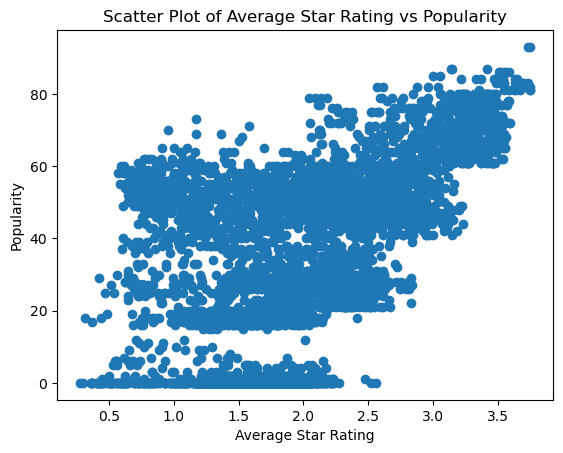

In [ ]:
x = fb_t['mean_rating']
y = df['popularity']

# Create the scatter plot
plt.scatter(x, y)
plt.xlabel('Average Star Rating')
plt.ylabel('Popularity')
plt.title('Scatter Plot of Average Star Rating vs Popularity')
plt.show()

In [ ]:
#general upward trend, popularity is numeric/quantitative while average star rating is technically ranked/orinal, thus trying pearson's correlation first

corr_results = pg.corr(x = fb_t['mean_rating'],
                       y = df['popularity'],
                       method='pearson')

corr_results

,n,r,CI95%,p-val,BF10,power
pearson,5000,0.569405,"[0.55, 0.59]",0.0,inf,1.0


So we get a decent moderately positive correlation (r = 0.57) between average star rating and popularity, significant at p < .001.

In [ ]:
"""let's try spearman's correlation test as well. This is not entirely approriate
because spearman's p （I don't know how to type rho sorry） is for two ranked variables, and we only have one (average star rating).
It is monotonic relationship as opposed to linear (which is what pearson's r is for)."""

res = stats.spearmanr(fb_t['mean_rating'], df['popularity'])
res

SpearmanrResult(correlation=0.5434743580977026, pvalue=0.0)

Macthes previous Pearson's correlation results. Demonstrates a moderate positive correlation (p = 0.54) at p <0.001. Let's try a regression model next.

In [ ]:
#build a simple regression model using average star rating to predict popularity

df_lr = pd.concat([df, fb_t], axis=1)

# define the linear model and fit the model (get the best coefficients to minimize the residuals)
lr = smf.ols(formula="popularity ~ mean_rating", data=df_lr).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     2398.
Date:                Wed, 20 Dec 2023   Prob (F-statistic):               0.00
Time:                        01:23:47   Log-Likelihood:                -22190.
No. Observations:                5000   AIC:                         4.438e+04
Df Residuals:                    4998   BIC:                         4.440e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -5.3873      0.852     -6.320      0.000      -7.058      -3.716
mean_rating    19.6969      0.402     48.969      0.000      18.908      20.485
==============================================================================
Omnibus:                      282.574   Durbin-Watson:                   0.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.804
Skew:                           0.185   Prob(JB):                     1.07e-28
Kurtosis:                       2.306   Cond. No.                         7.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Confirmed correlation results, predictor average star rating significant at p < .001 for the outcome popularity. A positive correlation/relationship between average star rating and popularity. The fact that average star ratings can explain 32% of the variance in popularity is quite interesting

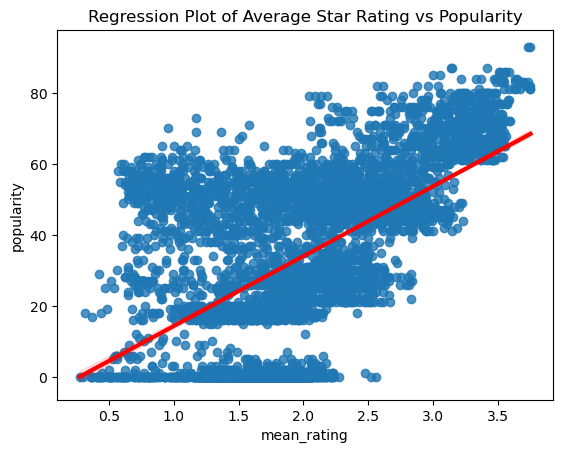

In [ ]:
#regression plot

sns.regplot(x='mean_rating', y='popularity', data=df_lr,
            line_kws={'color': 'red', 'lw': 3, 'linestyle': '-'})
plt.title('Regression Plot of Average Star Rating vs Popularity')
plt.show()


Therefore, yes, there is a significant positive relationship between popularity and average star ratings

### b) Which 10 songs are in the “greatest hits” (out of the 5k songs), on the basis of the popularity based model?

Let's do this the simple way first, which is the **baseline model**.

"The baseline model is a non-personalized recommendation model that recommends the same set of items to all users.
The assumption is that the most popular items, as determined by their average rating, will be a good recommendation for everyone." -- From lab

In [ ]:
#we need to use cross validation, create the recommender with training data, and validate it on test data
fb.reset_index(inplace=True)

unique_users = fb['index'].unique()
train_users, test_users = train_test_split(unique_users, test_size=0.2, random_state=seed)

train_ratings = fb[fb['index'].isin(train_users)]
test_ratings = fb[fb['index'].isin(test_users)]

In [ ]:
fb

,index,NaN,NaN.1,NaN.2,NaN.3,NaN.4,NaN.5,NaN.6,NaN.7,NaN.8,...,NaN.4462,0.152,NaN.4463,NaN.4464,NaN.4465,NaN.4466,NaN.4467,NaN.4468,NaN.4469,NaN.4470
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,0.0
2,2,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9994,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9995,9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,9996,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fb = fb.drop(['index'], axis=1)

In [ ]:
fb

,NaN,NaN.1,NaN.2,NaN.3,NaN.4,NaN.5,NaN.6,NaN.7,NaN.8,NaN.9,...,NaN.4462,0.152,NaN.4463,NaN.4464,NaN.4465,NaN.4466,NaN.4467,NaN.4468,NaN.4469,NaN.4470
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,0.0
2,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#check again

# Create a boolean DataFrame where True indicates a number greater than 5
bool = fb > 4

# Sum all the True values in the DataFrame to get the count
count_over_four = bool_fb.sum().sum()

print(f"Number of elements over 4: {count_over_four}")

Number of elements over 4: 0


In [ ]:
train_ratings.drop(columns=['index'], inplace = True)
train_ratings

/var/folders/yt/mrl3b5bd76lc2wz42ldb8zvw0000gn/T/ipykernel_6365/3304786262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ratings.drop(columns=['index'], inplace = True)


,NaN,NaN.1,NaN.2,NaN.3,NaN.4,NaN.5,NaN.6,NaN.7,NaN.8,NaN.9,...,NaN.4462,0.152,NaN.4463,NaN.4464,NaN.4465,NaN.4466,NaN.4467,NaN.4468,NaN.4469,NaN.4470
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,0.0
2,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9994,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9996,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_ratings.drop(columns=['index'], inplace = True)
test_ratings

/var/folders/yt/mrl3b5bd76lc2wz42ldb8zvw0000gn/T/ipykernel_6365/2998766751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_ratings.drop(columns=['index'], inplace = True)


,NaN,NaN.1,NaN.2,NaN.3,NaN.4,NaN.5,NaN.6,NaN.7,NaN.8,NaN.9,...,NaN.4462,0.152,NaN.4463,NaN.4464,NaN.4465,NaN.4466,NaN.4467,NaN.4468,NaN.4469,NaN.4470
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,3.0,NaN,NaN,NaN
9970,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
9990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_t = train_ratings.T.reset_index(drop=True)

In [ ]:
train_t

,0,1,2,4,5,6,9,11,12,13,...,9986,9987,9988,9989,9991,9992,9994,9996,9997,9998
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
1,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,2.0,NaN,NaN,1.0,0.0,NaN,NaN,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
4996,NaN,NaN,NaN,NaN,NaN,4.0,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_t['mean_rating'] = train_t.mean(axis=1)
train_t['count'] = train_t.count(axis=1)

In [ ]:
train_t

,0,1,2,4,5,6,9,11,12,13,...,9988,9989,9991,9992,9994,9996,9997,9998,mean_rating,count
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.215463,790
1,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,1.0,0.0,NaN,NaN,1.0,1.406863,817
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,2.196512,861
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.546667,826
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037453,802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.851036,773
4996,NaN,NaN,NaN,NaN,NaN,4.0,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.377805,803
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.914738,822
4998,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.901442,833


In [ ]:
df_pop = pd.concat([df, train_t], axis=1)
df_pop

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,...,9988,9989,9991,9992,9994,9996,9997,9998,mean_rating,count
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.6760,0.4610,1,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.215463,790
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.4200,0.1660,1,...,2.0,NaN,NaN,1.0,0.0,NaN,NaN,1.0,1.406863,817
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.4380,0.3590,0,...,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,2.196512,861
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.2660,0.0596,0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.546667,826
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.6180,0.4430,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037453,802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,Ludovico Einaudi,Elements (Deluxe),Drop,49,300293,False,0.4650,0.0342,2,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.851036,773
4996,4996,Air,Moon Safari,Kelly Watch the Stars,55,226293,False,0.5160,0.7430,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.377805,803
4997,4997,Ludovico Einaudi,Islands - Essential Einaudi,Passagio,50,357773,False,0.2220,0.0200,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.914738,822
4998,4998,Liquid Mind,Liquid Mind II: Slow World,Blue Seven,24,760053,False,0.0576,0.1690,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.901442,833


In [ ]:
#this is the top ten songs/greated hits based on baseline

top_ten_baseline = df_pop.sort_values('mean_rating', ascending=False).head(10)[['songNumber', 'track_name','mean_rating']]
top_ten_baseline

,songNumber,track_name,mean_rating
3003,3003,Sweater Weather,3.755767
3877,3877,"You're Gonna Go Far, Kid",3.752439
2105,2105,Californication,3.746601
3216,3216,Californication,3.745198
2260,2260,Can't Stop,3.742217
2562,2562,"You're Gonna Go Far, Kid",3.739927
3464,3464,Can't Stop,3.736579
2011,2011,Shut Up and Dance,3.735332
3253,3253,New Gold (feat. Tame Impala and Bootie Brown),3.730083
3201,3201,Bring Me To Life,3.717472


In [ ]:
# Convert the DataFrame to a dictionary with songNumber as keys and tuples of (track_name, popularity_score) as values
baseline_dict = {row['songNumber']: (row['track_name'], row['mean_rating'])
                   for index, row in top_ten_baseline.iterrows()}

print(baseline_dict)

{3003: ('Sweater Weather', 3.755766621438263), 3877: ("You're Gonna Go Far, Kid", 3.752439024390244), 2105: ('Californication', 3.746600741656366), 3216: ('Californication', 3.7451984635083226), 2260: ("Can't Stop", 3.7422166874221667), 2562: ("You're Gonna Go Far, Kid", 3.73992673992674), 3464: ("Can't Stop", 3.7365792759051186), 2011: ('Shut Up and Dance', 3.7353324641460235), 3253: ('New Gold (feat. Tame Impala and Bootie Brown)', 3.7300832342449466), 3201: ('Bring Me To Life', 3.717472118959108)}


(3.5, 4.0)

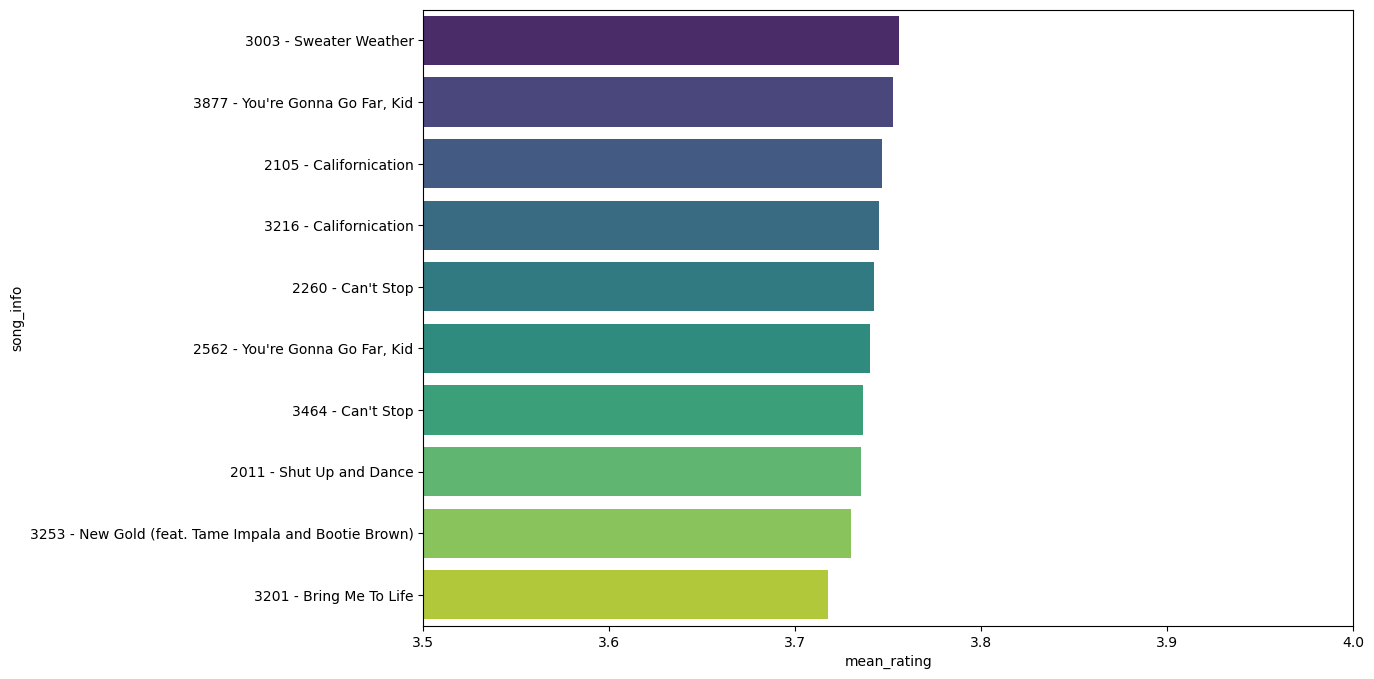

In [ ]:
# First, combine the 'songNumber' and 'track_name' into a single string
top_ten_baseline['song_info'] = top_ten_baseline['songNumber'].astype(str) + ' - ' + top_ten_baseline['track_name']

# Sort the DataFrame to ensure the plot is ordered
baseline_sorted = top_ten_baseline.sort_values('mean_rating', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='mean_rating', y='song_info', data=baseline_sorted, palette='viridis')
plt.xlim(3.5, 4)  # Set the x-axis range from 3.5

(Looks like there might be what looks like duplicates, but we can't remove them for reasons discussed earlier. )

In [ ]:
"""Take it up a notch, create a new popluarity score metric,
which is the product of popularity, mean user rating, and number of user ratings,
and we will call this our popularity model"""

#This is the top 10 based on the popularity model we constructed

df_pop['popularity_score'] = (df_pop['mean_rating'] * df_pop['count'] * df_pop['popularity'])
top_ten_pop = df_pop.sort_values('popularity_score', ascending=False).head(10)[['songNumber', 'track_name', 'popularity_score']]
top_ten_pop

,songNumber,track_name,popularity_score
2003,2003,Sweater Weather,282693.591187
3004,3004,abcdefu,259165.981087
3054,3054,Shut Up and Dance,257855.971395
3003,3003,Sweater Weather,257773.286296
3253,3253,New Gold (feat. Tame Impala and Bootie Brown),257539.866825
3877,3877,"You're Gonna Go Far, Kid",249540.947561
2105,2105,Californication,248849.221261
2562,2562,"You're Gonna Go Far, Kid",248405.934066
2203,2203,Losing My Religion,247853.614815
3407,3407,Losing My Religion,247350.126394


(240000.0, 290000.0)

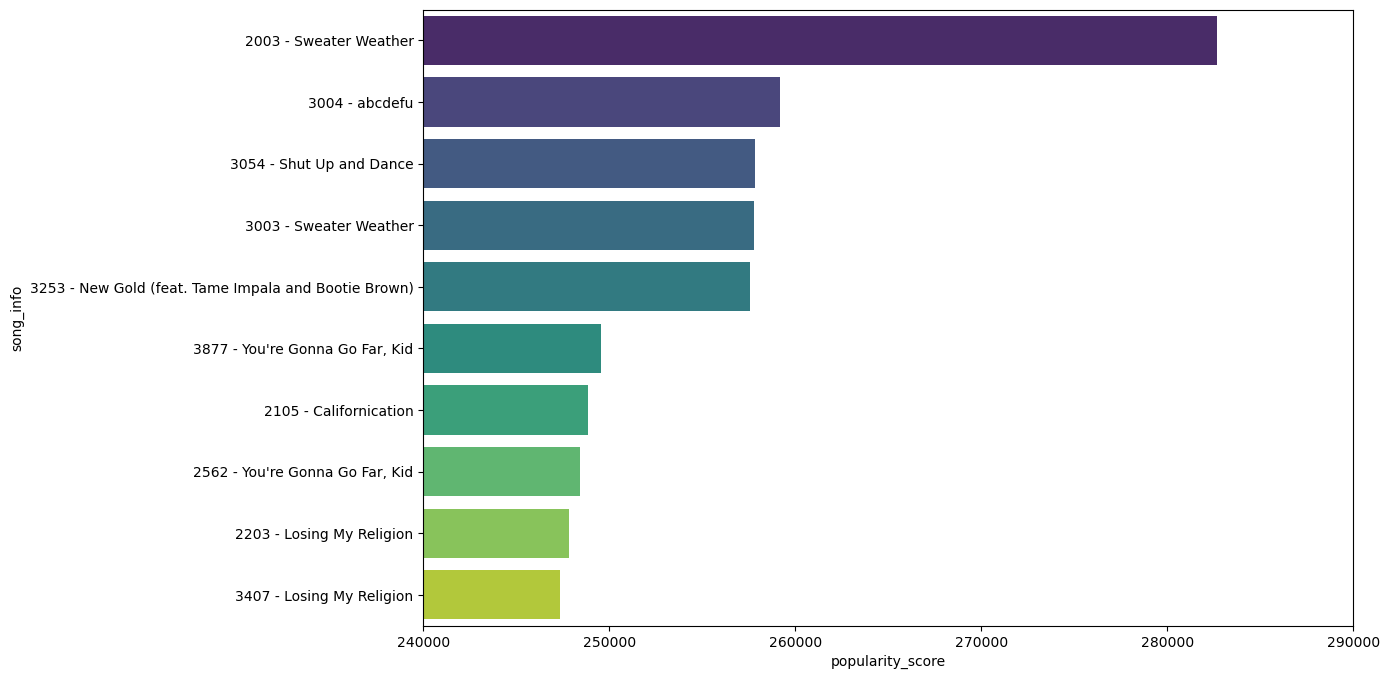

In [ ]:
# First, combine the 'songNumber' and 'track_name' into a single string
top_ten_pop['song_info'] = top_ten_pop['songNumber'].astype(str) + ' - ' + top_ten_pop['track_name']

# Sort the DataFrame to ensure the plot is ordered
pop_sorted = top_ten_pop.sort_values('popularity_score', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='popularity_score', y='song_info', data=pop_sorted, palette='viridis')
plt.xlim(240000, 290000)  # Set the x-axis range from 3.5

In [ ]:
# Convert the DataFrame to a dictionary with songNumber as keys and tuples of (track_name, popularity_score) as values
popularity_dict = {row['songNumber']: (row['track_name'], row['popularity_score'])
                   for index, row in top_ten_pop.iterrows()}

print(popularity_dict)

{2003: ('Sweater Weather', 282693.59118727053), 3004: ('abcdefu', 259165.98108747046), 3054: ('Shut Up and Dance', 257855.97139451728), 3003: ('Sweater Weather', 257773.28629579372), 3253: ('New Gold (feat. Tame Impala and Bootie Brown)', 257539.86682520807), 3877: ("You're Gonna Go Far, Kid", 249540.94756097562), 2105: ('Californication', 248849.22126081583), 2562: ("You're Gonna Go Far, Kid", 248405.93406593407), 2203: ('Losing My Religion', 247853.61481481482), 3407: ('Losing My Religion', 247350.12639405206)}


In [ ]:
# Convert the 'songNumber' columns to lists
baseline_list = top_ten_baseline['songNumber'].tolist()
pop_list = top_ten_pop['songNumber'].tolist()

# Count unique values that are present in both lists
unique_matches = set(baseline_list).intersection(set(pop_list))

# Count of unique matching values
number_of_unique_matches = len(unique_matches)

print(f"Number of unique matching values: {number_of_unique_matches}")

# Filter the original DataFrames to get the rows with the overlapping song numbers
overlapping_baseline = top_ten_baseline[top_ten_baseline['songNumber'].isin(unique_matches)]
overlapping_pop = top_ten_pop[top_ten_pop['songNumber'].isin(unique_matches)]

# Now, if you want to print the song number and track name for these overlapping items
print("Overlapping songs:")
for song_number in unique_matches:
    # Get the track name from one of the DataFrames
    track_name = overlapping_baseline.loc[overlapping_baseline['songNumber'] == song_number, 'track_name'].iloc[0]
    print(f"Song Number: {song_number}, Track Name: {track_name}")

Number of unique matching values: 5
Overlapping songs:
Song Number: 2562, Track Name: You're Gonna Go Far, Kid
Song Number: 3877, Track Name: You're Gonna Go Far, Kid
Song Number: 3253, Track Name: New Gold (feat. Tame Impala and Bootie Brown)
Song Number: 2105, Track Name: Californication
Song Number: 3003, Track Name: Sweater Weather


So the greatest hits generated from two methods have quite an overlap.

## Q10. You want to create a “personal mixtape” for all 10k users we have explicit feedback for. This mixtape contains individualized recommendations as to which 10 songs (out of the 5k) a given user will enjoy most. How do these recommendations compare to the “greatest hits” from the previous question and how good is your recommender system in making recommendations?

##### ***I happened to have done something very similar for project #2 extra credit, so I'm recycling and revising old code here. <br>

In [ ]:
#reset columns to song number
test_t = test_ratings.T.reset_index(drop=True)
test_ratings = test_t.T
test_ratings

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,3.0,NaN,NaN,NaN
9970,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
9990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#create personal mixtape for the test set

def top_ten_for_all():

    def top_ten_songs_by_user(row):
        # Sort the user's ratings in descending order and take the top n
        return row.nlargest(10).index.tolist()

    # Apply the function to each row (user) in the DataFrame
    return test_ratings.apply(top_ten_songs_by_user, axis=1)


personal_mixtape = top_ten_for_all()
personal_mixtape

3          [11, 13, 55, 75, 120, 140, 150, 167, 173, 184]
7        [77, 78, 140, 149, 151, 298, 338, 344, 546, 709]
8           [20, 53, 59, 63, 76, 107, 153, 175, 200, 231]
10           [15, 23, 45, 51, 53, 67, 111, 114, 166, 173]
22          [2, 59, 79, 85, 107, 134, 205, 223, 238, 240]
                              ...                        
9962     [64, 86, 146, 188, 362, 395, 498, 682, 773, 789]
9970       [5, 15, 20, 119, 191, 235, 244, 469, 517, 519]
9990       [7, 63, 85, 155, 185, 214, 219, 242, 252, 259]
9993     [53, 72, 122, 247, 288, 323, 332, 367, 379, 399]
9995    [108, 129, 149, 240, 293, 296, 409, 417, 456, ...
Length: 2000, dtype: object

In [ ]:
def average_precision(actual, predicted, k):

    if not actual:
        return 0.0

    ap_sum = 0.0
    num_hits = 0.0

    for i, rec in enumerate(predicted[:k]):
        if rec in actual and rec not in [predicted][:i]:
            num_hits += 1.0
            ap_sum += num_hits / (i + 1.0)

    return ap_sum / min(len(actual), k)

In [ ]:
def plot_ap_score_distribution(ap_scores):
    plt.figure(figsize=(10, 6))
    sns.histplot(ap_scores, bins=20, kde=True)
    plt.title('Distribution of Average Precision Scores')
    plt.xlabel('Average Precision Score')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
#we calculate the MAP score to assess the popularity model

def mean_average_precision(recommend_popular_songs, k):
    # the top n songs for each user
    test_data = personal_mixtape.to_dict()

    # Recommended ten popular songs (assumes recommend_popular_songs returns a sorted list of song titles)
    recommended_songs = recommend_popular_songs.index.values.tolist()

    # Assign these recommendations to each user in the dictionary
    user_recommendations = {user: recommended_songs for user in test_data}

    # Compute the average precision for each user
    ap_scores = [average_precision(test_data[user], user_recommendations[user], k) for user in test_data]

    # Calculate the mean average precision
    map_score = np.mean(ap_scores)

    # Print the mean average precision
    print(f"MAP@{k}: {map_score}")

    plot_ap_score_distribution(ap_scores)

MAP@10: 0.0005445833333333333


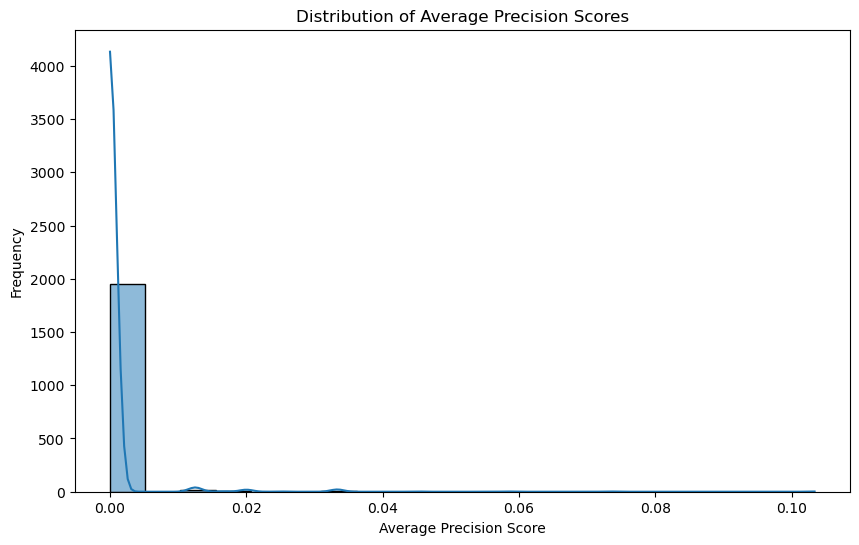

In [ ]:
mean_average_precision(top_ten_baseline,10)

MAP@10: 0.0009452777777777776


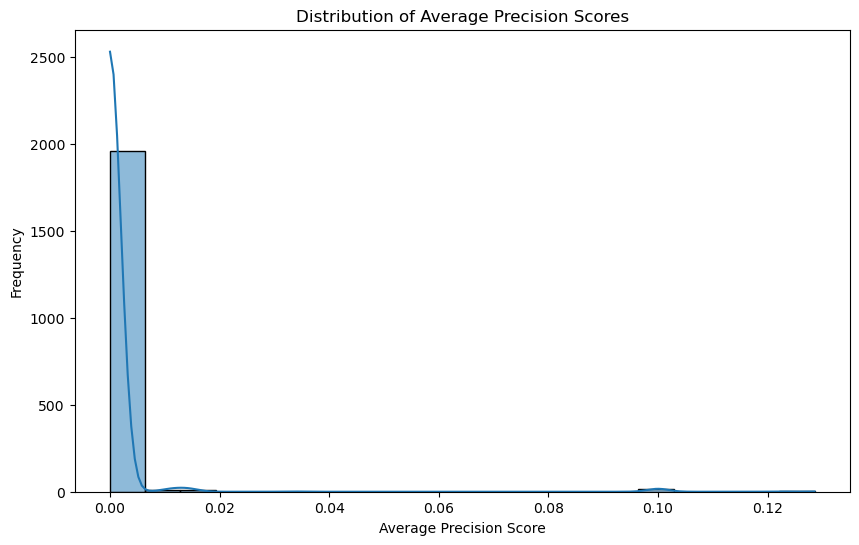

In [ ]:
#so the popularity model was doing better by a tiny margin

mean_average_precision(top_ten_pop,10)

In [ ]:
test_ratings

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,3.0,NaN,NaN,NaN
9970,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
9990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#both very low scores, suspecting smth might have gone wrong here
#let's go back and see how many users have less than 10 ratings, which could have affected results

counts = pd.DataFrame(test_ratings.count(axis = 1))
count_less_than_10 = (counts[0] < 10).sum()
count_less_than_10  #so nope, that's not the issue

0

## Extra Credit. Going from the previous question, let's try collaborative filtering.

In [ ]:
fb_cf = fb.T.reset_index(drop=True).T
fb_cf

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,0.0
2,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
"""Convert data into the long format so that they can be used for the surprise lib later"""

fb_cf = fb_cf.reset_index()

# Melt the DataFrame to get it in the long format expected by most collaborative filtering libraries
fb_long = fb_cf.melt(id_vars='index', var_name='song', value_name='rating')

# Remove NaN ratings as they usually represent missing data
fb_long = fb_long.dropna(subset=['rating'])

# Rename the columns to fit the library's expected input format
fb_long.columns = ['userID', 'itemID', 'rating']

fb_long

,userID,itemID,rating
7,7,0,2.0
14,14,0,3.0
15,15,0,0.0
23,23,0,4.0
30,30,0,3.0
...,...,...,...
49994939,9938,4999,1.0
49994951,9950,4999,0.0
49994954,9953,4999,0.0
49994985,9984,4999,0.0


In [ ]:
# """Convert train and test datasets into the long format so that they can be used for the surprise lib later"""

# #do train ratings first to see if this works
# train_ratings = train_ratings.reset_index()

# # Melt the DataFrame to get it in the long format expected by most collaborative filtering libraries
# train_long = train_ratings.melt(id_vars='index', var_name='song', value_name='rating')

# # Remove NaN ratings as they usually represent missing data
# train_long = train_long.dropna(subset=['rating'])

# # Rename the columns to fit the library's expected input format
# train_long.columns = ['userID', 'itemID', 'rating']

# train_long


In [ ]:
# #now do the same for test ratings
# test_ratings = test_ratings.reset_index()

# # Melt the DataFrame to get it in the long format expected by most collaborative filtering libraries
# test_long = test_ratings.melt(id_vars='index', var_name='song', value_name='rating')

# # Remove NaN ratings as they usually represent missing data
# test_long = test_long.dropna(subset=['rating'])

# # Rename the columns to fit the library's expected input format
# test_long.columns = ['userID', 'itemID', 'rating']

# test_long

In [ ]:
from surprise import Dataset, Reader
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

In [ ]:
fb_long['rating'] = fb_long['rating'].astype(int)
fb_long

,userID,itemID,rating
7,7,0,2
14,14,0,3
15,15,0,0
23,23,0,4
30,30,0,3
...,...,...,...
49994939,9938,4999,1
49994951,9950,4999,0
49994954,9953,4999,0
49994985,9984,4999,0


In [ ]:
fb_long['rating'].unique()

array([2, 3, 0, 4, 1])

In [ ]:
# Load your data into a pandas DataFrame and name the columns appropriately
# For example, the DataFrame might have columns: ['userID', 'itemID', 'rating']

# Load the dataset into Surprise's format
reader = Reader(rating_scale=(0, 4))  # Adjust the rating_scale to your data
data = Dataset.load_from_df(fb_long[['userID', 'itemID', 'rating']], reader)

# Split the dataset into the trainset and testset
trainset, testset = train_test_split(data, test_size=0.2)

# Use KNNBasic for collaborative filtering
algo = KNNBasic()

# Train the algorithm on the trainset
algo.fit(trainset)

# Predict ratings for the testset
predictions = algo.test(testset)

# Calculate RMSE
rmse = accuracy.rmse(predictions)


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0631


RMSE represents how far the predicted ratings are, on average, from the actual ratings. In this case, the predicted ratings are 1.06 pts away from the actual ratings on average.

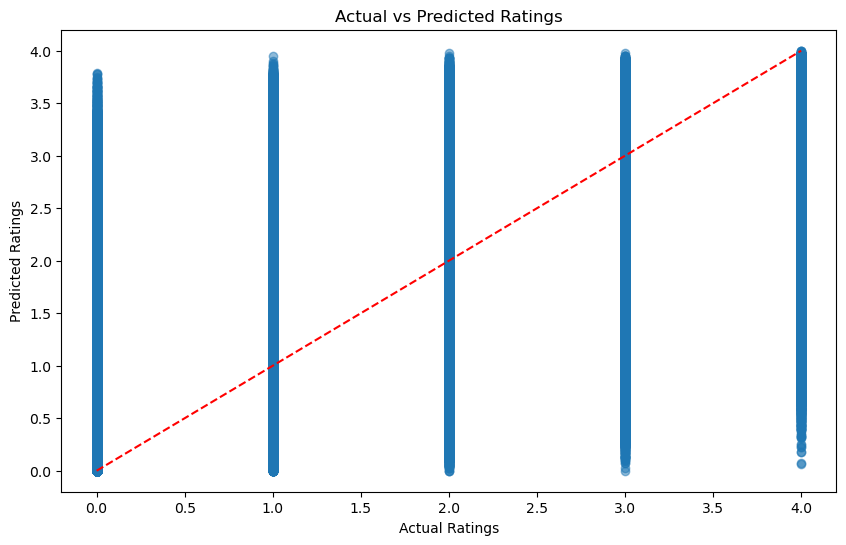

In [ ]:
actual = [pred.r_ui for pred in predictions]  # Actual ratings
predicted = [pred.est for pred in predictions]  # Predicted ratings

plt.figure(figsize=(10, 6))
plt.scatter(actual, predicted, alpha=0.5)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'r--')  # Diagonal line
plt.show()

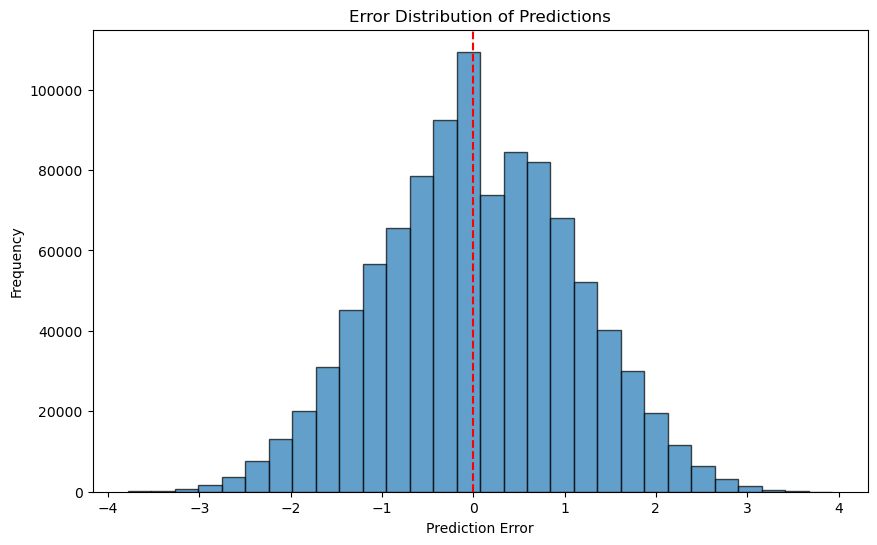

In [ ]:
# Calculate errors (differences between actual and predicted)
errors = [a - p for a, p in zip(actual, predicted)]

# Plotting the error distribution
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Error Distribution of Predictions')
plt.axvline(0, color='red', linestyle='--')  # Line at error = 0
plt.show()